# Sezione 5: Apprendimento supervisionato: Classificazione

## lezioni 31 - 34

#### Classificazione binomiale

##### (video introduttivo lezione 31)

Nella classificazione il target non è una variabile continua, ma categorica, quindi per prima cosa eseguiamo un encoding della variabile, come avremmo fatto con una proprietà. In questo modo le classi target sono rappresentate da due numeri: 0 e 1 
Avendo solo due classi, il problema che andremo ad affrontare è una Classificazione binomiale. in realtà la classe che andremo ad classificare è la classe 1, mentre l'altra classe è riconosciuta come l'assenza dalla classe positiva.

Lo scopo di un algoritmo di classificazione è di individuare la retta che meglio riesce a separare le due classi sul grafico( distribuiamo le osservazioni su un grafico, inserendo le due proprieta sui due assi, e identificando la classe di appartenenza con un colore). Questa retta è chiamata Decision Boundary, ovvero confine di decisione.
Questa retta è identificata dall'equazione:  b + w1x1 + w2x2 = 0
dove b e w sono rispettivamente bias e pesi del nostro modello. Una volta trovati bias e pesi validi, potremmo eseguire la nostra predizione come avevamo fatto per la predizione. Eseguendo la classificazione, troviamo un valore z che avrà valore >=0 se il punto che abbiamo provato a classificare si trova al di sopra della retta, e <0 se si trova al disotto (z = b + w1x1 + w2x2).
Abbiamo un altro problema: z è una variabile continua ma a noi serve ottenere una variabile categorica per sapere a quale dell due classi appartiene il punto.
Per ottenerla dobbiamo aggiungere un ulteriore step per problemi di classificazione:
L'applicazione di una funzione di attivazione: quello che fa una funzione di attivazione è prendere il valore z ritornato dalla funzione che ha trovato il nostro modello, e restituire la classe corrispondente.
La funzione di attivazione più semplice è quella che restituisce 1 se z>=0, altrimenti 0.
Vediamo questo ulteriore passaggio: La funzione appresa dal modello di classificazione ritorna un valore z. Questa z sarà un valore continuo il cui range va da -infinito a +infinito. Per ottenere la classe di appartenenza da z bisogna applicare la funzione di attivazione, che prende in input z e restituisce la classe di appartenenza, ovvero 0 o 1.

I punti che sono piu vicini alla retta Decision Boundary hanno un grado di incertezza maggiore rispetto ai punti più lontani dalla retta (ovvero sono meno certo che quel punto appartenga effettivamente all classe che il modello gli ha assegnato, dato che una piccola variazione li potrebbe portare dall'altra parte della retta).
z contiene questa informazione, sulla vicinanza alla decision boundary, ma quando applichiamo la funzione di attivazione perdiamo l'informazione, e otterremo solo degli 0 e degli 1, senza sapere che probabilita ha ognuno di essi di essere corretto.
Eppure cìè un modo per farlo, con un modello di classificazione noto come Regressione Logistica.
Prima di parlare nel dettaglio della regressione logistica viene fatto un piccolo ripasso di probabilita condiizonata che aiuta a capire il funzionamento della regressione logistica...

### Regressione logistica in Python

Una regressione logistica è un modello di classificazione che oltre a predire la classe di appartenenza, ci restituisce anche la probabilita di quanto la predizione fatta possa essere corretta.
Un problema di classificazione può essere ridotto nel trovare i coefficenti della retta che meglio separa gli esempi appartenenti a diverse classi.

Eseguiremo la classificazione usando il dataset: Winsconsis breast cancer dataset, un dataset contenete proprieta estratte da immagini digitali di tumori al seno. Lo scopo è quello di riconoscere un tumore maligno.

In [1]:
# importiamo le librerie che ci servono per eseguire la classificazione:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
# e importiamo il dataset:

breast_cancer = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data",
                           names=["id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean",
                                  "smoothness_mean","compactness_mean","concavity_mean","concave points_mean",
                                  "symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se",
                                  "area_se","smoothness_se","compactness_se","concavity_se","concave points_se",
                                  "symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst",
                                  "area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst",
                                  "symmetry_worst","fractal_dimension_worst"])

breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

ci sono 569 esempi e 32 colonne: quindi 31 proprieta e un target. Il target è diagnosis.


In [4]:
#Vediamo quali sono le classi da classificare:

breast_cancer["diagnosis"].unique()

array(['M', 'B'], dtype=object)

Le classi sono 2: M sta per maligno e B per benigno.

Cominciamo eseguendo una classificazione usando solo due proprieta: radius_se, che è l'errore standard del raggio del tumore,e concave points_worst, che rappresenta il numero peggiore di punti di concavita nel contorno del tumore.

In [5]:
# iniziamo creando gli array numpy:

X = breast_cancer[["radius_se","concave points_worst"]].values
Y = breast_cancer['diagnosis'].values



In [6]:
# e creiamo i due set di addestramento e di test:

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

Come abbiamo visto le classi target sono sottoforma di caratteri, quindi dovremmo trasformarle in numeri.
In realta questo passaggio si portebbe saltare perche la regressione logistica di SciKitLearn riesce a classificare anche taget non numerici. Noi comunque lo facciamo, usando il Label Encoder:


In [7]:
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.transform(Y_test)

In [8]:
# diamo uno sguardo ai primi valori, per vedere se sono numeri...

Y_train[:5]

array([0, 0, 0, 1, 0])

Adesso dobbiamo standardizzare il dataset: 
utiliziamo Standard.Scaler

In [9]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

ora possiamo eseguire la nostra regressione logistica:


In [10]:
# importiamo la classe da scikitlearn:

from sklearn.linear_model import LogisticRegression

# instanziamo la classe:

lr = LogisticRegression()

In [11]:
# e addestriamola sul trainset:

lr.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

adesso abbiamo il nostro modello e possiamo testarlo.
Per farlo usiamo due metriche:
Accuracy: che ci dice che percentuale delle predizioni fatte sono corrette
LogLikelyhood: tiene conto anche della probabilita di quanto la predizione fatta sia corretta.

scikitlearn implementa la negativa della loglikelyhood e quindi un valore minore di questa metrica indica una qualita del modello maggiore.


In [12]:
#importiamo le due funzioni: 
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

In [13]:
# eseguiamo le predizioni sul testset:

Y_pred = lr.predict(X_test)

In [14]:
# e otteniamo anche la probabilita di quanto una predizione sia corretta usando il metodo .predict_proba:

Y_pred_proba = lr.predict_proba(X_test)


In [15]:
# e stampiamo le metriche:

print("ACCURACY= " + str(accuracy_score(Y_test, Y_pred)))
print("LOG LOSS= " + str(log_loss(Y_test, Y_pred_proba)))

ACCURACY= 0.9064327485380117
LOG LOSS= 0.21553789916301572


considerando che abbiamo usato solo due proprieta i risultati non sono male, infatti l'accuracy va da 0 a 1: 0 indica che le predizioni effettuate sono tutte sbagliate e 1 che sono tutte corrette. Noi abbiamo accuracy=0.9
Mentra log loss va da 0 a 1, con 0 punteggio migliore. Noi abbiamo ottenuto log loss=0.21

Proviamo a visualizzare il decision boundary, ovvero il confine di decisoine che il nostro modello ha appreso.
Per farlo si usa una funzione abbastanza complicata, quindi ora la usiamo senza approfondirla, ma nel notebook relativo alla lezione ci sono approfondimenti.


In [16]:
#defianiamo la funzione showBounds:

def showBounds(model, X, Y, labels=["Negativo","Positivo"]):
    
    h = .02 

    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    X_m = X[Y==1]
    X_b = X[Y==0]
    plt.scatter(X_b[:, 0], X_b[:, 1], c="green",  edgecolor='white', label=labels[0])
    plt.scatter(X_m[:, 0], X_m[:, 1], c="red",  edgecolor='white', label=labels[1])
    plt.legend()

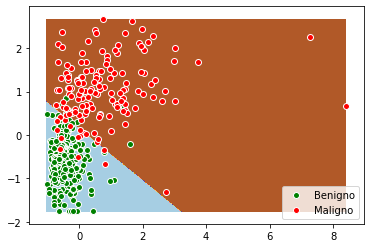

In [17]:
showBounds(lr, X_train, Y_train, labels=["Benigno", "Maligno"])

Il modello è riuscito a dividere abbastanza bene un tumore benigno da uno maligno per quanto riguarda il trainset.
Vediamo come va per il testset:

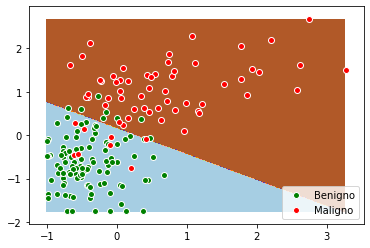

In [18]:
showBounds(lr, X_test, Y_test, labels=["Benigno", "Maligno"])

Anche sul testset le performance sono abbastanza buone. Il decision boundary potrebbe sembrare diverso, ma in realta è lo stesso, quello che è cambiato è la scala in cui sono rappresentati i dati.

Ora proviamo a rieseguire la classificazione usando tutte le proprieta del dataset, eccetto la "id", che contiene un identificativo univoco dell'immagine digitale caricata nel dataset, e quindi non da nessuna informazione al nostro modello

In [19]:
# creaimo gli array numpy:
X = breast_cancer.drop(["id","diagnosis"], axis=1).values
Y = breast_cancer["diagnosis"].values

In [20]:
# per tutto il resto possiamo semplcmente copiare il codice di sopra:

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.transform(Y_test)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, Y_train)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
Y_pred = lr.predict(X_test)

Y_pred_proba = lr.predict_proba(X_test)

print("ACCURACY= " + str(accuracy_score(Y_test, Y_pred)))
print("LOG LOSS= " + str(log_loss(Y_test, Y_pred_proba)))



ACCURACY= 0.9766081871345029
LOG LOSS= 0.08937194803422048


i risultati sono migliori rispetto al caso precedente, perche un modello con piu informazioni è sempre un modello migliore

Ora ci possiamo chiedere: e se volessimo implementare la regolarizzazione in un modello di regressione logistica?
In realta lo abbiamo gia fatto senza saperlo, perche la regressione logistica implementa 2 parametri:
penalty: con cui possiamo scegleiere il tipo di regolarizzazione da applicare: l2 o l1
c: è l'inverso del parametro di regolarizzazione Lambda (o alpha). un valore maggioire di c rendera la regolarizzazione piu debole, mente un valore basso la rafforzera.
Di default questi parametri sono impostati su l2 e 1, quindi non specificandoli la nostra regressione logistica implementa una regolarizzazione l2 e c=1, quindi lambda=1

### Classificazione multiclasse:
#### classificazione quando il dataset contiene piu di due classi target.

Classificazione One vs All (OvA):
ci permette di affrontare un problema di classificazione multiclasse come piu classificazioni binarie. Consiste nel creare un modello di classificzione per ognuna delle classi utilizzando gli esempi di una classe come positivi e quelli di tutte le altre come negativi. Ogni modello sara in grado di predire una classe, e ad ogni predizione è associata una probabilita. Prendimo per buona quella con la probabilita piu alta.

Ora eseguiamo una classificazione multiclasse con la tecnica OvA in Python:
usiamo un dataset di cifre scritte a mano, e il nostro obiettivo è di riuscire a riconoscere tale numero:

In [22]:
# importiamo le librerie necessarie

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

%matplotlib inline

# e importiamo la funzione che ci permettera di caricare il dataset di esempio direttamente da scikitlearn:

from sklearn.datasets import load_digits


In [23]:
#e carichiamo il nostro dataset:

digits = load_digits()

In [24]:
# creiamo gli array numpy per propieta e target:

X = digits.data
Y = digits.target

In [25]:
# diamogli uno sguardo:
X.shape

(1797, 64)

Il dataset contiene 1797 osservazioni e 64 proprieta:
ogni proprieta rappresenta un pizel dell'immagine, infatti le immagini originarie erano in formato 8x8 e in scala di grigi, quindi ogni proprieta avra un valore omoreso fra 0 e 255, in base all'intensita del grigio.



In [26]:
# Diamo uno sguardo alle classi:

np.unique(Y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

 Abbiamo 9 classi, da 0 a 9, cherappresentano il numero figurato nell'immagine.

Proviamo a visualizzare un esempio di immagini per ognuna delle classi, per farlo possiamo usare la funzione imshow di matplotlib che ci permette di visualizzare un immagine partend da una matrice di pixel:


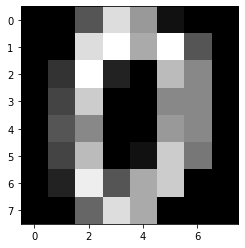

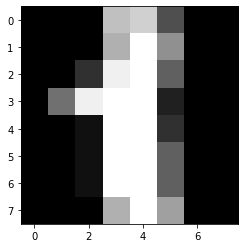

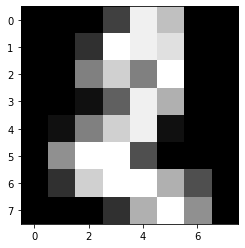

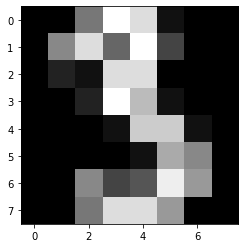

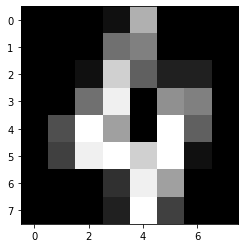

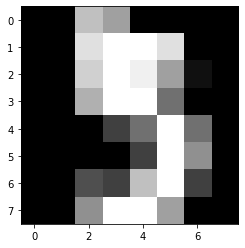

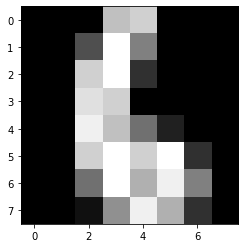

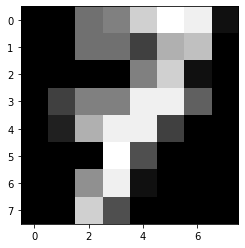

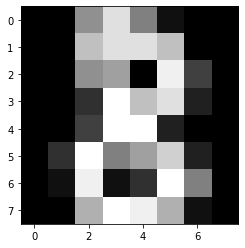

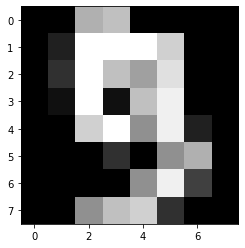

In [27]:
# facciamo un ciclo for per i che va da 0 a 10, ovvero per ognuna delle nostre classi:

for i in range(0,10):
    pic_matrix = X[Y==i][0].reshape([8,8])  # prendiamo una matrice X, gli applichiamo una maschera che gli dice
                                            # di selezionare tutti i valori appartenenti alla classe i, 
                                            #ovvero alla classe corrente, e di questi selezioniamo il primo,e usiamo 
                                            #reshape per ottenere la matrice 8x8
    plt.imshow(pic_matrix, cmap = "gray")   #possiamo usare la funzione imshow passando la matrice e specificando
                                            #che è un immagine in scala di grigi
    plt.show()                              # e visualizziamo le immagini.

In [28]:
#Ora creiamo i nostri set per addestramento, trainset, e test, testset:

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

# tratandosi di immagini cnviene normalizzare le colonne in modo da avere distribuzioni normali di valori
#che va da 0 a 1, piuttosto che da 0 a 255.
#Questo facilita molto la fase di addestramento.
    
#Quindi importiamo la classe minmaxscaler:

from sklearn.preprocessing import MinMaxScaler

In [29]:
# la instanziamo:
mms = MinMaxScaler()

X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)


Ora possiamo eseguire la classificazione multiclasse:
non dobbiamo fare nulla di piu che eseguire una regressione logistica, infatti la classe logistic regression di scikitlearn è in grado di riconoscere un problema di classificazione multiclasse e automaticamente applicare il metodo One vs All:


In [30]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
# Abbiamo il nostro modello. 
# Calcoliamone la qualita calcolando l'accuracy e il logloss:
Y_pred = lr.predict(X_test)
Y_pred_proba = lr.predict_proba(X_test)


In [32]:
print("ACCURACY= " + str(accuracy_score(Y_test,Y_pred)))
print("LOG LOSS= " + str(log_loss(Y_test,Y_pred_proba)))

ACCURACY= 0.9574074074074074
LOG LOSS= 0.23627626645272895


Introduciamo una nuova metrice, molto utile per la classificazione, e soprattutto nei casi di classificazione multiclasse:
La matrice di confusione, che ci permette di vedere su quali classi il nostro modello ha commesso piu errori:


In [33]:
# importiamola da scikitlearn:

from sklearn.metrics import confusion_matrix

# e calcoliamola:
cm = confusion_matrix(Y_test,Y_pred)

# e diamogli uno sguardo:
cm

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 49,  0,  0,  0,  0,  1,  0,  2,  0],
       [ 0,  1, 51,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0, 51,  0,  0,  0,  0,  2,  1],
       [ 0,  0,  0,  0, 47,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 54,  1,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 59,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0,  0, 51,  0,  0],
       [ 0,  1,  1,  1,  0,  1,  0,  0, 56,  1],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  1, 54]], dtype=int64)

Questa matrice mostra come gli esempi sono stati classificati:
le colonne rappresentano le classi predette metre le righe corrispondono alle classi corrette: 
ad esempio un valore di 2 alla quinta colonna della nona riga indica che due immagini rappresentati un 9 sono state classificate invece come un 5.
Adesso per visualizzare questa matrice in maniera piu chiara usiamo seaborn insieme a matplotlib:

Text(0.5, 60.0, 'Classe predetta')

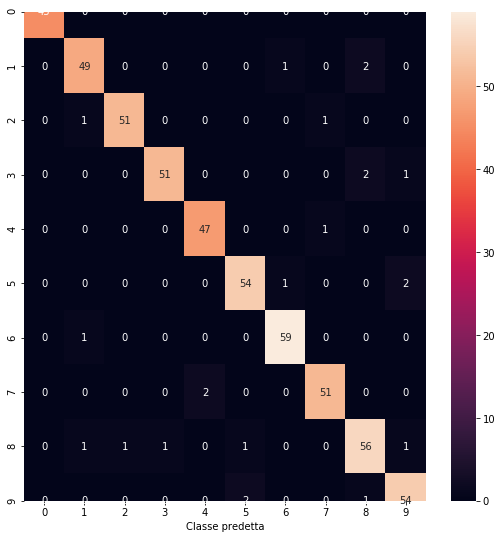

In [36]:
import seaborn as sns

# e una figura di dimensione 9x9:
plt.figure(figsize=(9,9))
# e usiamo seaborn per creare una heatmap, inserendo anche i valori all'interno dei vari quadrati:

sns.heatmap(cm, annot= True)
plt.ylabel = ("Classe corretta")
plt.xlabel("Classe predetta")



Text(0.5, 123.82799999999995, 'Classe predetta')

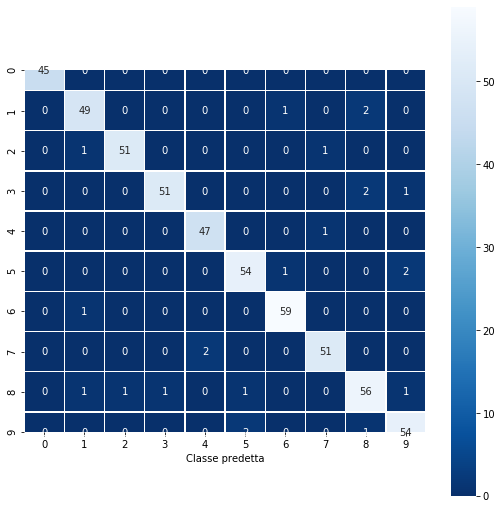

In [37]:
# Vista cosi non è ne elegante e ne chiara. Quindi cambiamo lo schema di colori e altre cose grafiche:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot= True, cmap="Blues_r", linewidths = 0.5, square = True)
plt.ylabel = ("Classe corretta")
plt.xlabel("Classe predetta")


Dalla heatmap il nostro modello effettua le classificazioni abbastanza bene.
Nonostante la regressione logistica sia in grado di eseguire automaticamente una regressione multiclasse tramite il metodo OvA, scikitlearn implementa ache un modello che fa appositamente questo:


In [38]:
from sklearn.multiclass import OneVsRestClassifier
# per usare questo modello bisogna passargli un classificatore di base che poi lui usera automaticamente,
#e poi possiamo usarelo come un qualsiasi altro modello

ovr = OneVsRestClassifier(LogisticRegression())
ovr.fit(X_train, Y_train)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [39]:
# Vediamo le performance del modello attraverso le metriche:

Y_pred = ovr.predict(X_test)
Y_pred_proba  = ovr.predict_proba(X_test)

print("ACCURACY= " + str(accuracy_score(Y_test, Y_pred)))
print("LOG LOSS= " + str(log_loss(Y_test, Y_pred_proba)))

    

ACCURACY= 0.9574074074074074
LOG LOSS= 0.23627626752415712


E' esattamente lo stesso risultato di prima